# Optimization of an IoV system

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from utils.plots import plot_network, plot_rsu_ids
from utils.main import (
    migration_time, computation_time,
    data_transfer_time,
    get_closest_rsu
)   

## Importing the data

In [2]:
rsu = pd.read_csv('data/rsu.csv')
es = pd.read_csv('data/es.csv')
tasks = pd.read_csv('data/tasks.csv')

# Generating a Network

In [3]:
def get_network(rsu: pd.DataFrame, es: pd.DataFrame):
    # choose a random number of RSUs M
    M = np.random.randint(1, len(rsu))
    # choose a random number of ESs W, with W < M
    W = np.random.randint(1, M)

    # choose M random RSUs
    rsu = rsu.sample(M)
    # choose W random ESs
    es = es.sample(W)

    # add the prefix 'RSU_' to the columns of rsu
    rsu.columns = ['RSU_' + col for col in rsu.columns]
    # add the prefix 'ES_' to the columns of es
    es.columns = ['ES_' + col for col in es.columns]

    # shuffle the rows of both dataframes
    rsu = rsu.sample(frac=1).reset_index(drop=True)
    es = es.sample(frac=1).reset_index(drop=True)

    # merge the rsu and es dataframes 
    rsu = pd.concat([rsu, es], axis=1)

    # shuffle the rows of rsu again
    rsu = rsu.sample(frac=1).reset_index(drop=True)

    # fill the empty ES_ID with 'AP'
    rsu['ES_ID'] = rsu['ES_ID'].fillna('AP')
    # fill the rest of the empty values with 0
    rsu = rsu.fillna(0)

    return {
        'M': M,
        'W': W,
        'network': rsu,
    }


In [4]:
network = get_network(rsu, es)

In [5]:
print(f"Number of RSUs: {network['M']}")
print(f"Number of ESs: {network['W']}")

Number of RSUs: 56
Number of ESs: 41


In [6]:
network['network'].head()

,RSU_ID,RSU_X,RSU_Y,RSU_DTR,ES_ID,ES_VM_NB,ES_VM_CP
0,28,32,18,41,17.0,4.0,6.0
1,35,94,60,41,AP,0.0,0.0
2,14,25,25,12,AP,0.0,0.0
3,26,33,49,3,22.0,3.0,6.0
4,54,62,63,16,7.0,4.0,6.0


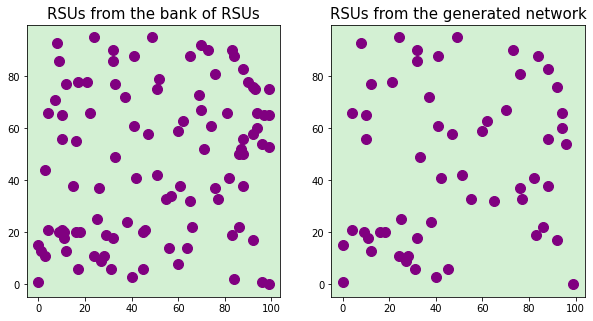

In [7]:
# display on the left the RSUs from the X and Y columns in the rsu dataframe
# display on the right the RSUs from the RSU_X and RSU_Y columns in the network dataframe
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(rsu['X'], rsu['Y'])
ax[1].scatter(network['network']['RSU_X'], network['network']['RSU_Y'])

# make the background of the plot light green
ax[0].set_facecolor('#d3f0d3')
ax[1].set_facecolor('#d3f0d3')

# increase the size of the points and make them purple
ax[0].scatter(rsu['X'], rsu['Y'], s=100, c='#800080')
ax[1].scatter(network['network']['RSU_X'], network['network']['RSU_Y'], s=100, c='#800080')

# add a title to each plot
ax[0].set_title('RSUs from the bank of RSUs')
ax[1].set_title('RSUs from the generated network')

# make the titles a bit bigger
ax[0].title.set_size(15)
ax[1].title.set_size(15)

plt.show()

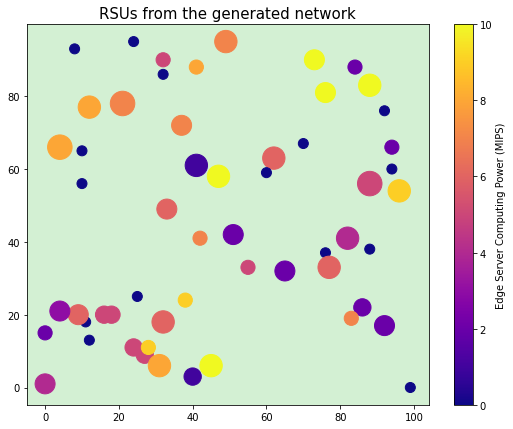

In [8]:
plot_network(network['network'])

## Getting the max of each metric for the network

In [9]:
# create a dictionary of the RSU in the network dataframe
rsu_dict = network['network'].set_index('RSU_ID').to_dict('index')

In [10]:
# for each rsu in rsu_dict, add a new key 'RSU_CLOSEST' with the index of the closest rsu
for rsu_id in rsu_dict.keys():
    rsu_dict[rsu_id]['RSU_CLOSEST'] = get_closest_rsu(rsu_dict, rsu_id)

In [11]:
# for each rsu in rsu_dict, add a new key 'STATE' set to 'IDLE'
for rsu_id in rsu_dict.keys():
    rsu_dict[rsu_id]['RSU_STATE'] = 'IDLE'

# for each rsu in rsu_dict, add a new key 'RSU_TIME_QUEUE' set to 0
for rsu_id in rsu_dict.keys():
    rsu_dict[rsu_id]['RSU_TIME_QUEUE'] = 0

In [26]:
for task in tasks:
    # choose a random RSU from rsu_dict
    rsu_id = np.random.choice(list(rsu_dict.keys()))
    
    if rsu_dict[rsu_id]['RSU_STATE'] == 'IDLE':
        # if the rsu is an AP and the task type is 'DATA TRANFER' 
        # set the rsu state to 'BUSY'
        # set the rsu_time to the computation time of the task

        # I DONT KNOW HOW TO DO THIS PART
 